In [1]:
import skimage.morphology
import skimage.io
import skimage.transform
from skimage.filters import threshold_otsu
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def rotate180(arr):
    arr180 = skimage.transform.rotate(arr, 180, preserve_range=True)
    return arr180

In [3]:
def normalizeBF(arr):
    thresh = threshold_otsu(arr)
    pxforeground = arr[arr>thresh]
    
    imgnorm = (arr-arr.min()) / (np.percentile(pxforeground, 99) - arr.min())
    
    return imgnorm

In [4]:
#The GFP needs to be heavily contrasted in order for it to show up well when overlaid with BF channel
def normalizeGFP(arr):
    thresh = threshold_otsu(arr)
    pxforeground = arr[arr>thresh]
    
    imgnorm = (arr-arr.min()) / (np.percentile(pxforeground, 50) - arr.min())
    
    return imgnorm

In [5]:
def screenBlend(arr1, arr2):
    blend = 1 - (1-arr1)*(1-arr2)
    return blend

In [6]:
#Need only one BF image for final overlay. Rotate by 180 to be aligned with Moldev Camera
HEK_BF = skimage.io.imread('A3-HEK-BF-1.tif')
HEK_norm = normalizeBF(HEK_BF)
HEK_norm = rotate180(HEK_norm)

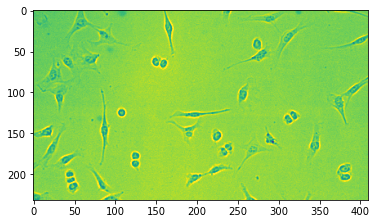

In [7]:
plt.imshow(HEK_norm, vmax=1)

In [8]:
#Load HEK-GFP and overlay with HEK BF
HEK_GFP = skimage.io.imread('A3-HEK-488-1.tif')
HEK_GFP_norm = normalizeGFP(HEK_GFP)
HEK_GFP_norm = rotate180(HEK_GFP_norm)

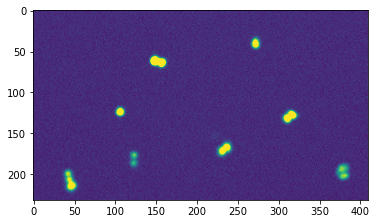

In [9]:
plt.imshow(HEK_GFP_norm, vmax=1)

In [10]:
#Convert to color channels
HEK_BF_color = skimage.color.gray2rgb(HEK_norm)

#Set GFP to green - Green - Set 0,2 to 0
HEK_GFP_color = skimage.color.gray2rgb(HEK_GFP_norm)
HEK_GFP_color[:,:,[0,2]] = 0

BF_overlay = screenBlend(HEK_BF_color, HEK_GFP_color)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


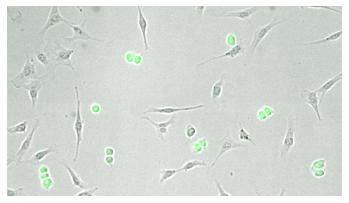

In [11]:
plt.imshow(BF_overlay)
plt.axis("off")
plt.savefig('NJS127-A3-BF-overlay.png', dpi=1000, bbox_inches='tight', transparent='True', pad_inches=0)

### Overlaying ROI Masks ###
For overlaying the ROI, its easier to just do it in illustrator once you convert the .tif files into vector files.  
Theres more options for line widths and transparency overlays once its a vector file.

In [12]:
#Note distance calibrations
#Original image is 410x232 at 10x objective and 1.6 microns / pixel
